## Projeto Final do Módulo de Técnicas de Programação I
#### Descrição:
    Análise Exploratória de Dados de Vendas Online
### Regras:
- Aplicar o conhecimento de Numpy, Pandas e Git vistos em aula

#### Grupo composto por:
- Rayssa Vilaça



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clientes = pd.read_csv('assets/olist_customers_dataset.csv')
geolocalizacao = pd.read_csv('assets/olist_geolocation_dataset.csv')
ordem_itens = pd.read_csv('assets/olist_order_items_dataset.csv')
ordem_pagamentos = pd.read_csv('assets/olist_order_payments_dataset.csv')
ordem_revisao = pd.read_csv('assets/olist_order_reviews_dataset.csv')
ordens = pd.read_csv('assets/olist_orders_dataset.csv')
produtos = pd.read_csv('assets/olist_products_dataset.csv')
vendedores = pd.read_csv('assets/olist_sellers_dataset.csv')
traducao_nome_categoria_produto = pd.read_csv('assets/product_category_name_translation.csv')

### Análise Exploratória Inicial das Tabelas

#### Clientes

In [8]:
# Primeiramente, ver o conteúdo da tabela
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
print(f'A tabela clientes possui {clientes.shape[0]} linhas e {clientes.shape[1]} colunas')

A tabela clientes possui 99441 linhas e 5 colunas


In [5]:
# Ver o nome e o tipo de dados de cada coluna e verificar se há dados nulos ou faltantes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Outra forma de verificar os dados faltantes
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [69]:
# Verificar a frequencia para as colunas categóricas cidade e estado
frequencia_clientes_por_cidade = clientes.value_counts('customer_city')
frequencia_clientes_por_estado = clientes.value_counts('customer_state')

print(frequencia_clientes_por_cidade, frequencia_clientes_por_estado, sep="\n-\n")

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: count, Length: 4119, dtype: int64
-
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


<Axes: title={'center': 'As Cinco Cidades com mais Clientes'}, xlabel='Cidades Brasileiras', ylabel='Número de Clientes'>

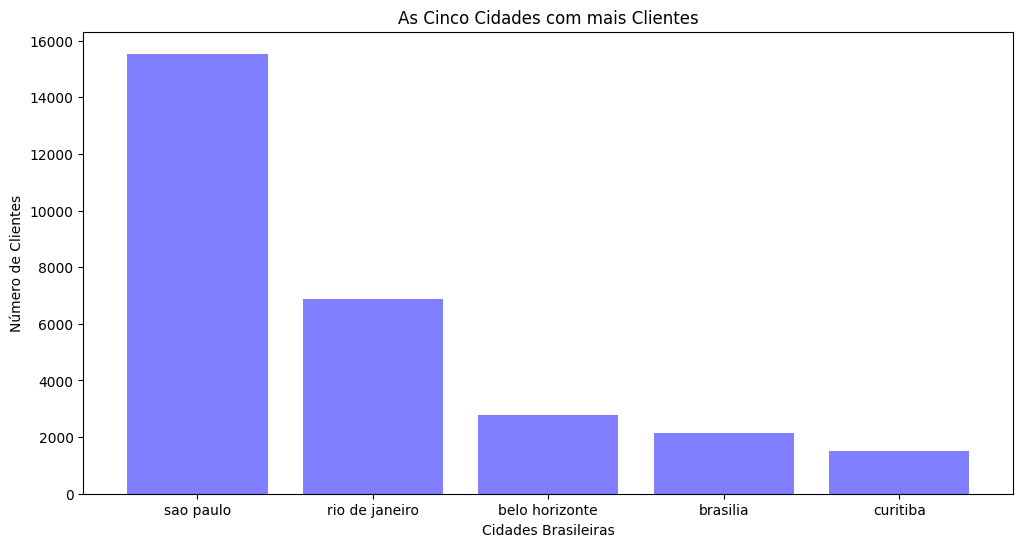

In [57]:
frequencia_clientes_por_cidade.nlargest(5).plot(kind='bar',
                                                title='As Cinco Cidades com mais Clientes',
                                                xlabel='Cidades Brasileiras',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

<Axes: title={'center': 'Os Cinco Estados com mais Clientes'}, xlabel='Estados Brasileiros', ylabel='Número de Clientes'>

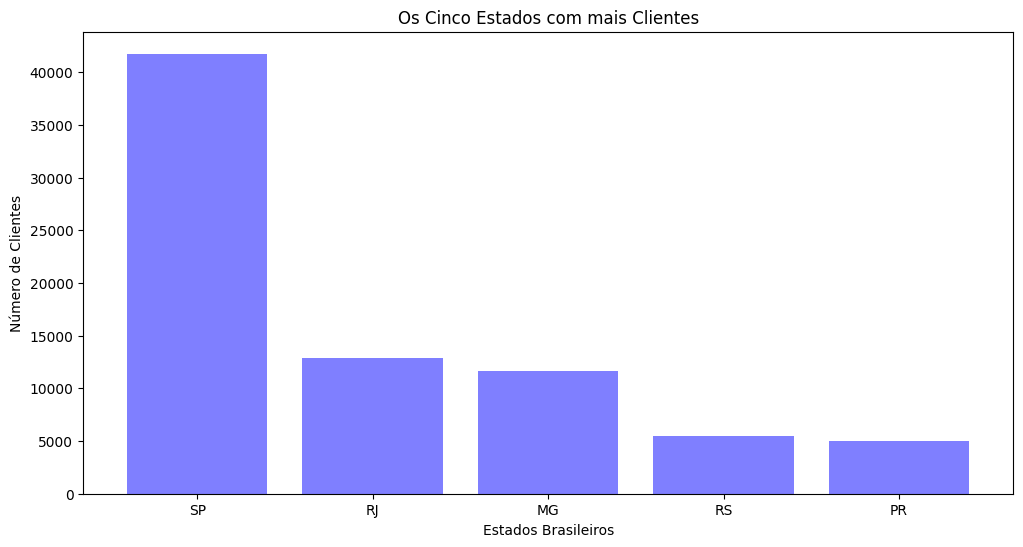

In [58]:
frequencia_clientes_por_estado.nlargest(5).plot(kind='bar',
                                                title='Os Cinco Estados com mais Clientes',
                                                xlabel='Estados Brasileiros',
                                                ylabel='Número de Clientes',
                                                rot=0,
                                                width=0.8,
                                                color='blue',
                                                alpha=0.5,
                                                figsize=(12, 6)
                                                )

#### Geolocalizacao

In [70]:
geolocalizacao.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [71]:
print(f'A tabela geolocalizacao possui {geolocalizacao.shape[0]} linhas e {geolocalizacao.shape[1]} colunas')

A tabela geolocalizacao possui 1000163 linhas e 5 colunas


In [72]:
geolocalizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [73]:
geolocalizacao.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64